In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from wittgenstein import RIPPER

from utils.constants import STAGE_DIR
from utils.dataload import load_data
from utils.display import cdisplay
from utils.functions import split_train_test
from utils.plots import decision_boundary_plot
from utils.transformers import SequentialFeatureSelectorTransformer

# Load data

In [4]:
# Load all dataset
X_all = load_data(
    STAGE_DIR / 'preprocess' / 'X_train.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using univariate analysis
X_mi = load_data(
    STAGE_DIR / 'selection' / 'X_train_mi.parquet',
    load_func=pd.read_parquet).sort_index()

X_x2 = load_data(
    STAGE_DIR / 'selection' / 'X_train_x2.parquet',
    load_func=pd.read_parquet).sort_index()

X_anova = load_data(
    STAGE_DIR / 'selection' / 'X_train_anova.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using multivariate analysis
X_relief = load_data(
    STAGE_DIR / 'selection' / 'X_train_relief.parquet',
    load_func=pd.read_parquet).sort_index()

In [5]:
y = load_data(
    STAGE_DIR / 'preprocess' / 'y.parquet',
    load_func=pd.read_parquet).sort_index()

In [6]:
X_train_all, X_test_all, y_train_all, y_test_all = split_train_test(X_all, y)
X_train_mi, X_test_mi, y_train_mi, y_test_mi = split_train_test(X_mi, y)
X_train_x2, X_test_x2, y_train_x2, y_test_x2 = split_train_test(X_x2, y)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = split_train_test(X_anova, y)
X_train_relief, X_test_relief, y_train_relief, y_test_relief = split_train_test(X_relief, y)

# Support Vector Machine

The training occurs in a SVM model with polynomial kernel. The in-sample scores are calculated using a cross validation method with 5 validation steps. The accuracy is used as the metric to evaluate the model performance.

## All features

### Training and score in the sample (80% - 0.01 std)

In [7]:
svm_all = SVC(kernel='poly')
svm_all_scores = cross_val_score(
    svm_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_all_scores.mean(),
    svm_all_scores.std())
)

0.81 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [8]:
svm_all = SVC(kernel='poly').fit(X_train_all, y_train_all['y'])
y_test_predict_all = svm_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       569
           1       0.62      0.29      0.39       178

    accuracy                           0.79       747
   macro avg       0.72      0.62      0.63       747
weighted avg       0.76      0.79      0.76       747



### Decision boundary

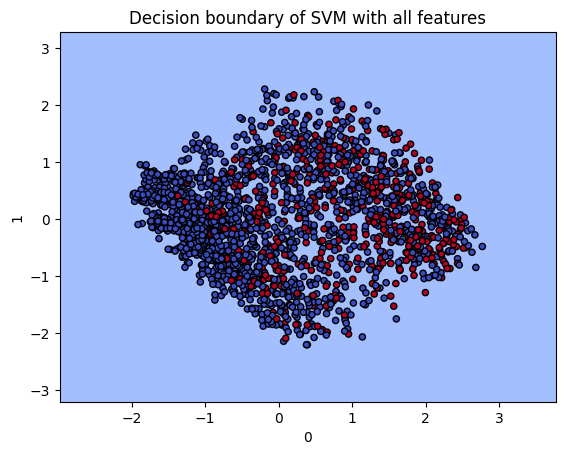

In [9]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_all, y_train_all,
    'SVM with all features'
)

## Univariate - Mutual Information

### Training and score in the sample (80% - 0.01 std)

In [10]:
svm_mi = SVC(kernel='poly')
svm_mi_scores = cross_val_score(
    svm_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_mi_scores.mean(),
    svm_mi_scores.std())
)

0.79 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [11]:
svm_mi = SVC(kernel='poly').fit(X_train_mi, y_train_mi['y'])
y_test_predict_mi = svm_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_mi))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       594
           1       0.55      0.31      0.40       153

    accuracy                           0.81       747
   macro avg       0.70      0.62      0.64       747
weighted avg       0.78      0.81      0.79       747



### Decision boundary

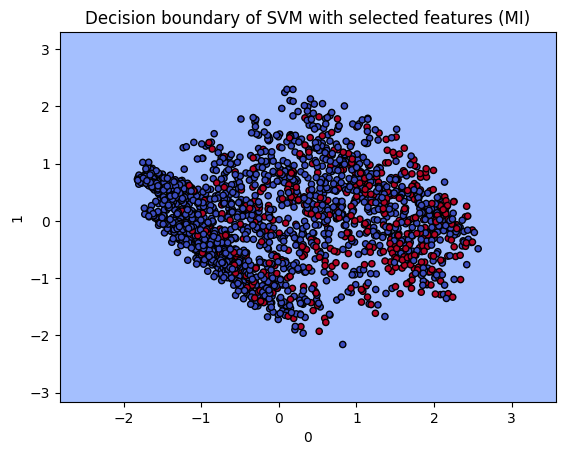

In [12]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_mi, y_train_mi,
    'SVM with selected features (MI)'
)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [13]:
svm_x2 = SVC(kernel='poly')
svm_x2_scores = cross_val_score(
    svm_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_x2_scores.mean(),
    svm_x2_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [14]:
svm_x2 = SVC(kernel='poly').fit(X_train_x2, y_train_x2['y'])
y_test_predict_x2 = svm_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_x2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       581
           1       0.51      0.20      0.29       166

    accuracy                           0.78       747
   macro avg       0.66      0.57      0.58       747
weighted avg       0.74      0.78      0.74       747



### Decision boundary

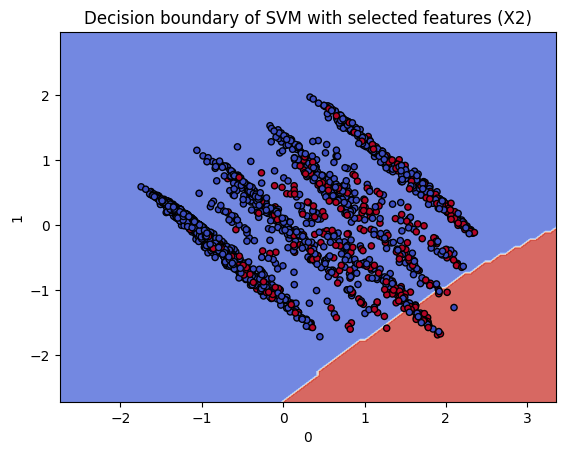

In [15]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_x2, y_train_x2,
    'SVM with selected features (X2)'
)

## Univariate - ANOVA

### Training and score in the sample (80% - 0.02 std)

In [16]:
svm_anova = SVC(kernel='poly')
svm_anova_scores = cross_val_score(
    svm_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_anova_scores.mean(),
    svm_anova_scores.std())
)

0.80 accuracy with a standard deviation of 0.02


### Out-of-sample score

In [17]:
svm_anova = SVC(kernel='poly').fit(X_train_anova, y_train_anova['y'])
y_test_predict_anova = svm_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_anova))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       570
           1       0.60      0.29      0.39       177

    accuracy                           0.79       747
   macro avg       0.70      0.62      0.63       747
weighted avg       0.76      0.79      0.76       747



### Decision boundary

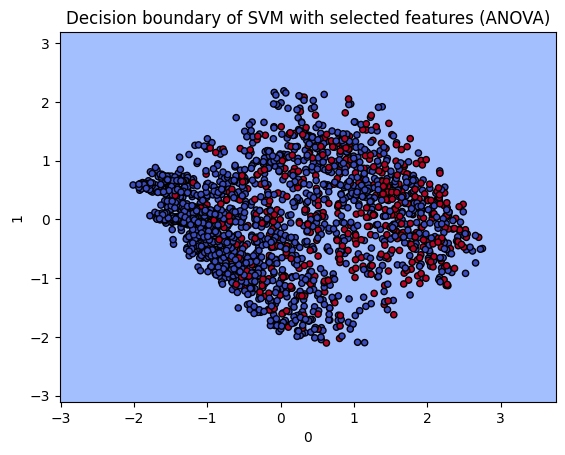

In [18]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_anova, y_train_anova,
    'SVM with selected features (ANOVA)'
)

## Multivariate - Relief

### Training and score in the sample (78% - 0.1 std)

In [19]:
svm_relief = SVC(kernel='poly')
svm_relief_scores = cross_val_score(
    svm_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_relief_scores.mean(),
    svm_relief_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [20]:
svm_relief = SVC(kernel='poly').fit(X_train_relief, y_train_relief['y'])
y_test_predict_relief = svm_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_relief))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       596
           1       0.53      0.26      0.35       151

    accuracy                           0.80       747
   macro avg       0.68      0.60      0.62       747
weighted avg       0.77      0.80      0.78       747



### Decision boundary

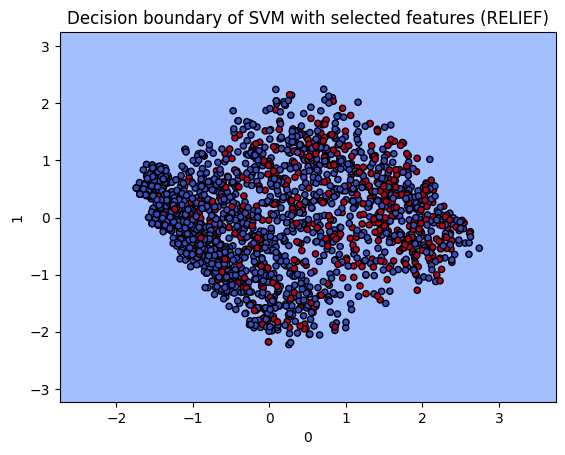

In [21]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_relief, y_train_relief,
    'SVM with selected features (RELIEF)'
)

## Wrapper

### Select features

In [22]:
svm_wrapper = SVC(kernel='poly')

svm_fs_wrapper = SequentialFeatureSelectorTransformer(
    svm_wrapper, n_features_to_select=75)

print('Fitting model. This may take a while...')
X_wrapper = svm_fs_wrapper.fit_transform(X_all, y['y'])
print('We have a winner!')

X_train_wrapper, X_test_wrapper, y_train_wrapper, y_test_wrapper = split_train_test(X_wrapper, y)

Fitting model. This may take a while...
We have a winner!


In [24]:
X_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')

### Training and score in the sample (80% - 0.1 std)

In [ ]:
svm_wrapper_scores = cross_val_score(
    svm_wrapper,
    X_train_wrapper,
    y_train_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_wrapper_scores.mean(),
    svm_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
svm_all = SVC(kernel='poly').fit(X_train_all, y_train_all['y'])
y_test_predict_all = svm_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_all, y_train_all,
    'SVM with all features'
)

# Classification Tree

## All features

## Univariate - Mutual Information

## Univariate - $\chi^2$

## Univariate - ANOVA

## Multivariate - Relief

## Wrapper

# Rule Induction - RIPPER

## All features

## Univariate - Mutual Information

## Univariate - $\chi^2$

## Univariate - ANOVA

## Multivariate - Relief

## Wrapper

# K-Nearest Neighbors

## All features

## Univariate - Mutual Information

## Univariate - $\chi^2$

## Univariate - ANOVA

## Multivariate - Relief

## Wrapper